# Objective

The goal of this project is to predict house prices (*target*) in California based on various features such as *median income*, *average number of rooms*, and *location*.

I will be using different regression techniques to model the relationship between these features and housing prices, aiming to:

* Build a robust predictive model.
* Analyze the importance of different features.
* Use regularization techniques to avoid overfitting.
*	Test both linear and non-linear models to improve predictive accuracy.

[California Housing dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data), which contains features related to demographics and geographic data to predict the median house value for California districts.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [ ]:
# Load the California Housing dataset
housing_data = fetch_california_housing(as_frame=True)

# Convert to a DataFrame
df = housing_data.frame

# Rename target column if needed (optional)
# df.rename(columns={'MedHouseVal': 'Target'}, inplace=True)
df.rename(columns={df.columns[-1]: 'Target'}, inplace=True)

# Preview the DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Exploratory Data Analysis

## Checklist

Explore the data: Perform initial exploration using descriptive statistics:

* Visualize the relationship between features (correlation heatmaps).

* Identify any missing values and outliers.

* Look for linear and non-linear patterns.

## Basic Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Check missing values

In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Target,0


### Replace missing values

## Descriptive Summary

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Data Distribution

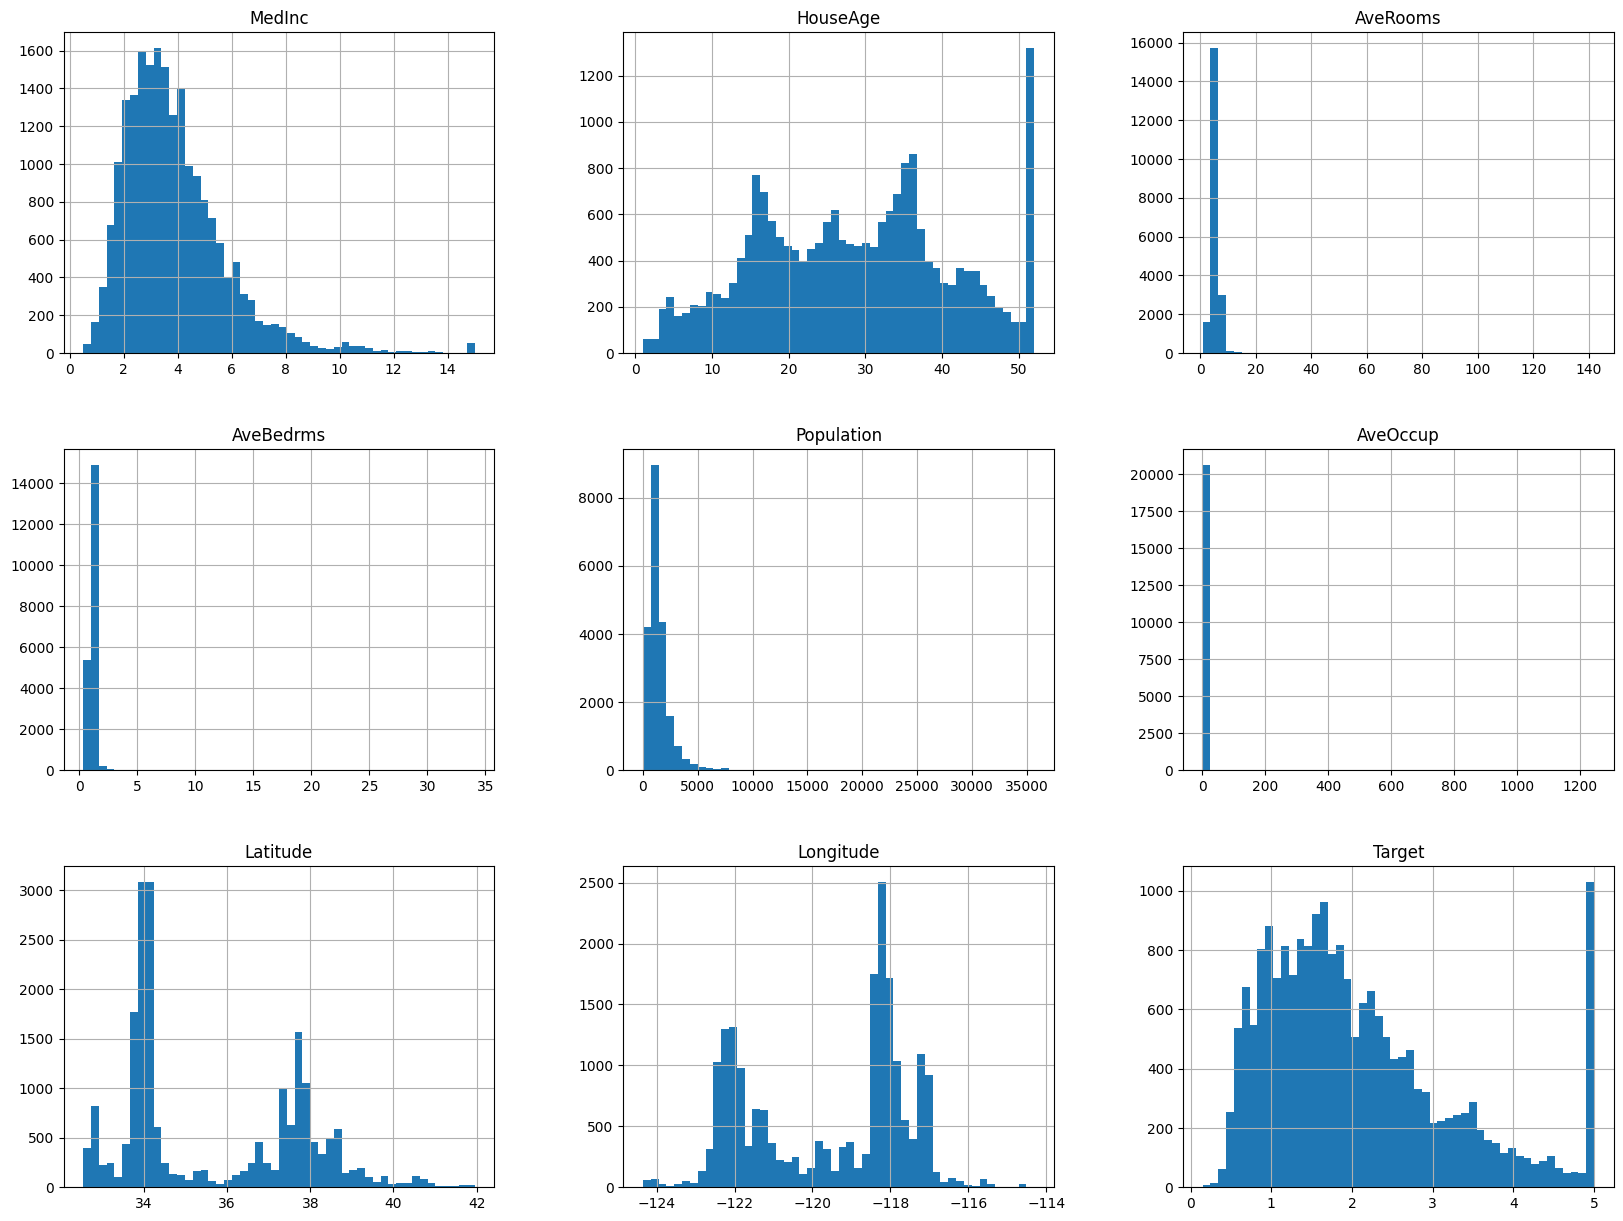

In [ ]:
# Plot histograms of all numeric columns
df.hist(bins=50, figsize=(20,15))
plt.show()

## Correlation Matrix

In [ ]:
# # Obeserve correlations with heatmap
# plt.figure(figsize=(10,6))
# heatmap = df.corr()

# # Ploty
# sns.heatmap(heatmap, annot=True, cmap='rocket').set(
#     title = "Correlation between the data")

# # Show
# plt.xticks(rotation=360)
# plt.show()

In [ ]:
# heatmap['Target']

## Regplot

In [ ]:
# # List features and target
# target = 'Target'
# features = df.columns.drop(target)

# # Plot regplot for each feature against the target (MedHouseVal)
# for feature in features:
#     plt.figure(figsize=(8, 6))
#     sns.regplot(x=df[feature], y=df[target], scatter_kws={"alpha":0.3})
#     plt.title(f'Regression plot of {feature} vs Median House Value')
#     plt.xlabel(feature)
#     plt.ylabel('Median House Value')
#     plt.show()

## Boxplot

In [ ]:
# # Generate a box plot for the features in the dataset
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df)
# plt.xticks(rotation=45)
# plt.title('Box Plot for California Housing Dataset')
# plt.show()

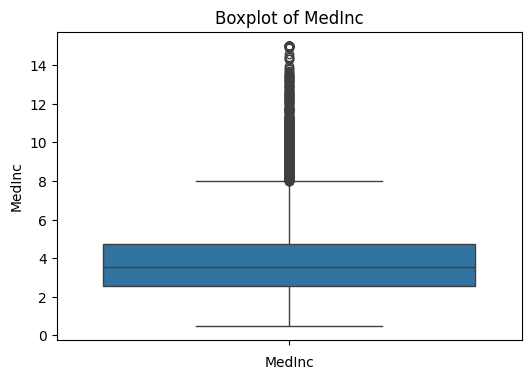

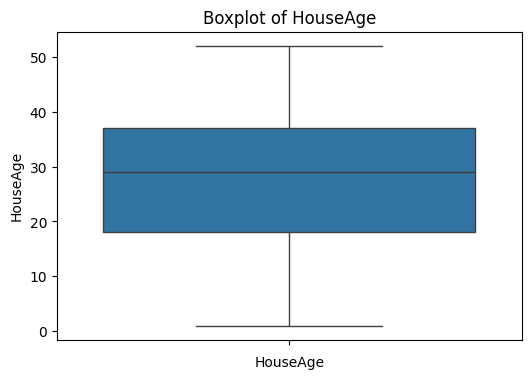

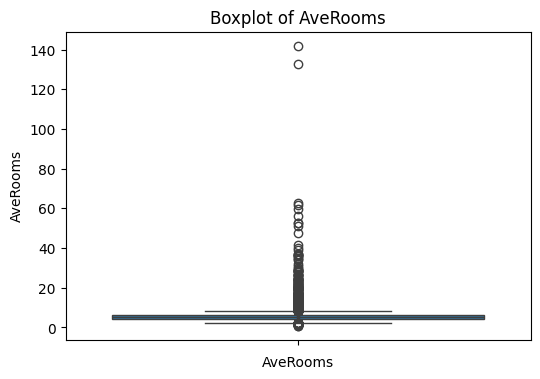

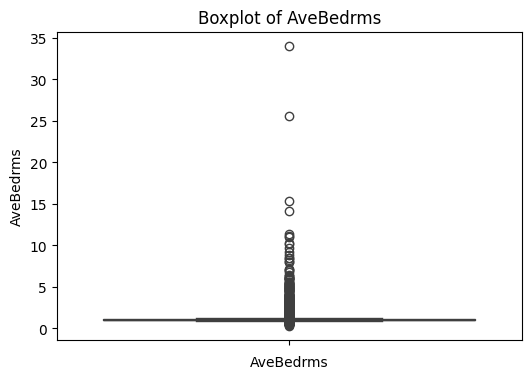

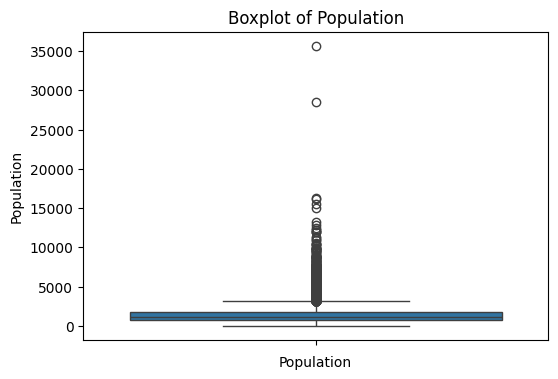

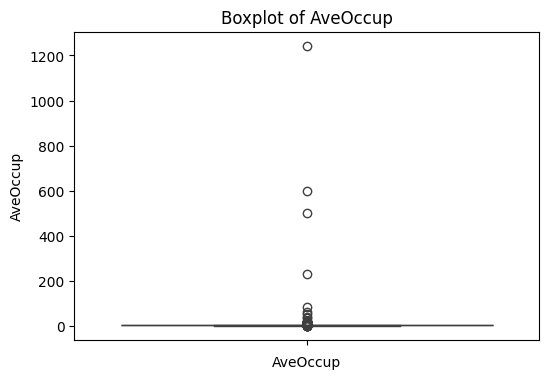

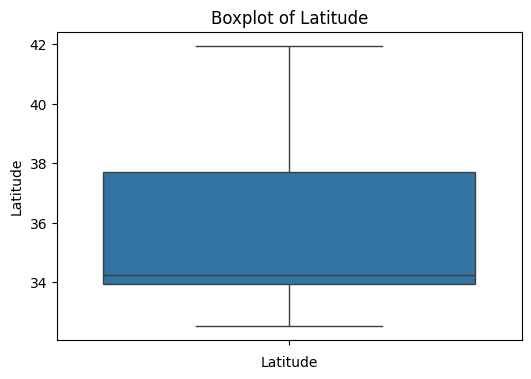

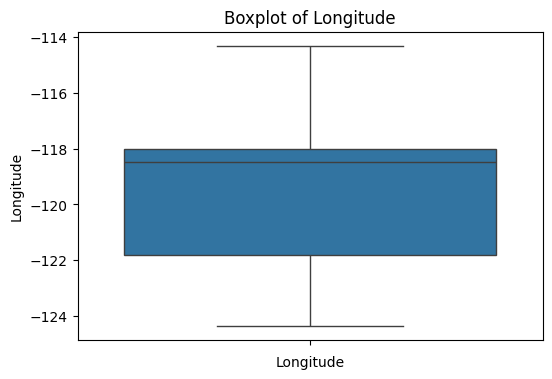

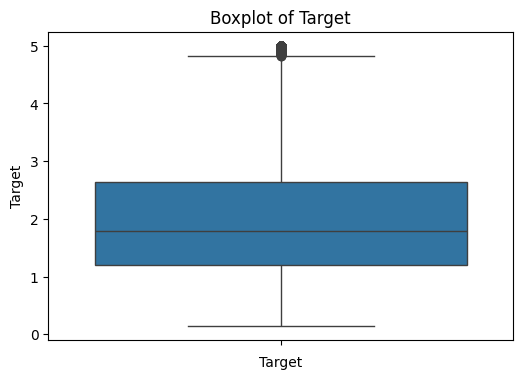

In [ ]:
# Create boxplots for all numeric features in the dataset
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[column]) # for horizontal plot, change y to x
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

# Preprocessing & Data Splitting


## Checklist

| Steps | Methods |
| ----- | ---- |
| Handle missing data | SimpleImputer()|
| Handle outliers | |
| Feature encoding| Independent:OneHotEncoder() + ColumnTransformer()|

* <b>Handle missing data</b>
  *  

* Handle outliers

* Feature encoding
  *
  *

* Feature Engineer = Scaling + Extraction
  * Feature Scaling
    * StandardScaler()
    * Normalization()
  
  * Feature Extraction

* Train Test Split
  * train_test_split()

## Encoding Categorical Data

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# # Create a ColumnTransformer to apply one-hot encoding to column index 3 (categorical feature), the other columns unchanged (passthrough).
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

# # Apply the transformation (one-hot encoding on column 3) and convert the result to a NumPy array.
# X = np.array(ct.fit_transform(X))


## Data Splitting

[train_test_split()](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
# Features
X = df.drop('Target' ,axis=1).values
# X = df.iloc[:,:-1].values

# Target
y = df['Target'].values
# y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
# Train-test split (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

16512
4128


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Model has been fit and transformed with X_train_scaled
X_test_scaled = scaler.transform(X_test) # Apply scaled formation onto X_test

# Linear Model

## Multi-Linear Regression

* Linear regression assumes a linear relationship between independent variables and the target.
* It works well when the relationship is approximately linear.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize LR model
mlr = LinearRegression()

# Train linear model
# mlr.fit(X_train_scaled, y_train)
mlr.fit(X_train, y_train)

# Predict on the test set
# y_pred_mlr = mlr.predict(X_test_scaled)
y_pred_mlr = mlr.predict(X_test)

# Evaluate the model prediction
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

print(f"Mean Squared Error (MSE): {mse_mlr}")
print(f"R-squared (R2): {r2_mlr}")

# Coefficients of the model
coef_mlr = pd.DataFrame(data=mlr.coef_, index=df.columns[:-1], columns=["Coefficient"])
print("\nCoefficients of the model:")
print(coef_mlr)

Mean Squared Error (MSE): 0.5558915986952422
R-squared (R2): 0.5757877060324524

Coefficients of the model:
            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708


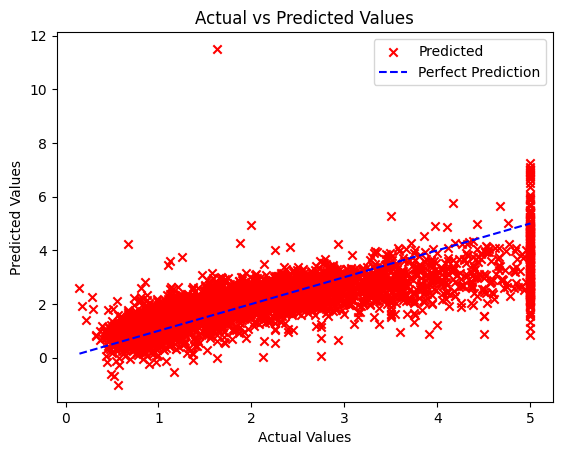

In [ ]:
# Scatterplot
plt.scatter(y_test, y_pred_mlr, color='Red', label='Predicted', marker='x')

# Line Plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='Blue', linestyle='--', label='Perfect Prediction')

# Add title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

# Non-Linear Model

## Polynomial Regression

* Polynomial regression is used when the relationship between the independent and dependent variables is non-linear but can be approximated with polynomial terms.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Create polynomial features (degree 2 or 3 typically)
poly = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly, LinearRegression())

# Train and predict
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Evaluate the model prediction
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Mean Squared Error (MSE): {mse_poly}")
print(f"R-squared (R2): {r2_poly}")

Mean Squared Error (MSE): 0.4643015261571134
R-squared (R2): 0.6456819711504156


In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error, r2_score

# # Create a PolynomialFeatures object with degree 2
# poly_reg = PolynomialFeatures(degree = 2)

# # Fit & Transform input features into polynomial features
# poly_features = poly_reg.fit_transform(X_train)

# # Create a new LinearRegression model and add polynomial features and target y
# reg_poly = LinearRegression()
# reg_poly.fit(poly_features, y_train)

# # Predict test set
# y_pred_poly2 = reg_poly.predict(poly_reg.transform(X_test))

# # Evaluate the model prediction
# mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
# r2_poly2 = r2_score(y_test, y_pred_poly2)

# print(f"Mean Squared Error (MSE): {mse_poly2}")
# print(f"R-squared (R2): {r2_poly2}")


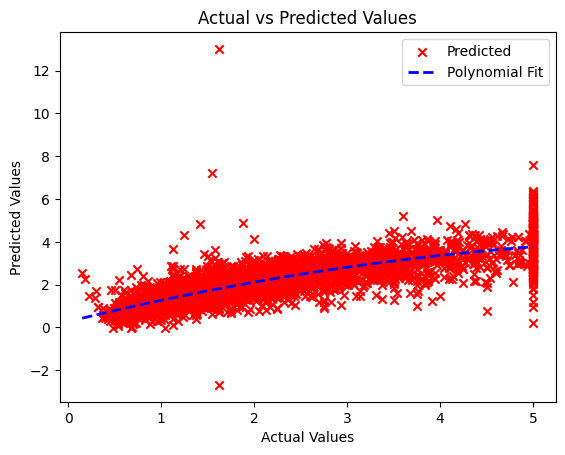

In [ ]:
# Generate the polynomial curve
# np.polyfit() fits a polynomial of a given degree (deg=2 in this example, but adjust according to your model) to the data.
# np.polyval() evaluates the polynomial on your sorted data to generate smooth curve points.
x_sorted = np.sort(y_test)  # Sort your X values for smooth plotting
y_curve = np.polyval(np.polyfit(y_test, y_pred_poly, deg=2), x_sorted)  # Adjust the degree as per your model

# Scatterplot of actual vs predicted values
plt.scatter(y_test, y_pred_poly, color='Red', label='Predicted', marker='x')

# Plot the polynomial curve
plt.plot(x_sorted, y_curve, color='Blue', label='Polynomial Fit', linestyle='--', linewidth=2)

# Add title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()


### Finding the optimal Polynomial degree

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import Pipeline

# # Create a pipeline with PolynomialFeatures and LinearRegression
# pipeline = Pipeline([
#     ('poly', PolynomialFeatures()),
#     ('linear', LinearRegression())
# ])

# # Define the parameter grid for the degree of the polynomial
# param_grid = {'poly__degree': np.arange(1, 10)}  # Test degrees from 1 to 9

# # Initialize GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# # Fit the model to the training data
# grid_search.fit(X_train, y_train)

# # Find the optimal degree
# best_degree = grid_search.best_params_['poly__degree']
# print(f'Optimal polynomial degree: {best_degree}')

## Decision Tree Regression

* Decision trees are non-parametric models that work by splitting the data into subsets. They’re great for capturing non-linear relationships.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Model
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

# Predict on test set
y_pred_dtr = dtr.predict(X_test)

# Evaluate the model prediction
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

print(f"Mean Squared Error (MSE): {mse_dtr}")
print(f"R-squared (R2): {r2_dtr}")

# Coefficients of the model
coef_dtr = pd.DataFrame(data=mlr.coef_, index=df.columns[:-1], columns=["Coefficient"])
print("\nCoefficients of the model:")
print(coef_dtr)

Mean Squared Error (MSE): 0.495235205629094
R-squared (R2): 0.622075845135081

Coefficients of the model:
            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708


## Support Vector Regression (SVR)

* SVR is effective in high-dimensional spaces and can model non-linear relationships using kernel tricks like the radial basis function (RBF).

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Standardizing the data is necessary for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()

# Scale the features training and test data to fit into SVR model
X_train_scaled = sc_X.fit_transform(X_train)   # Fit and transform the training data
X_test_scaled = sc_X.transform(X_test)         # Only transform the test data, no fitting

# Scale the target variable (y)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1))  # Reshape and scale y_train

# Fit the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled.ravel())

# Predict and inverse transform the predictions
y_pred_svr = svr.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1))  # Inverse transform to original scale

# Evaluate Model Performance
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"R2 score: {r2_svr}")
print(f"Mean Squared Error: {mse_svr}")


R2 score: 0.7297401300519581
Mean Squared Error: 0.354150960038132


In [ ]:
# Scatterplot for predicted vs actual values
plt.scatter(y_test, y_pred_svr, color='Red', label='Predicted', marker='x')

# 45-degree line for perfect prediction
plt.plot([min(y_test.min(), y_pred_svr.min()), max(y_test.max(), y_pred_svr.max())],
         [min(y_test.min(), y_pred_svr.min()), max(y_test.max(), y_pred_svr.max())],
         color='Blue', linestyle='--', label='Perfect Prediction')

# Tolerance band (±epsilon)
epsilon = 0.1  # Tolerance margin
upper_tolerance = y_test + epsilon
lower_tolerance = y_test - epsilon
plt.fill_between(y_test.ravel(), lower_tolerance.ravel(), upper_tolerance.ravel(),
                 color='gray', alpha=0.3, label=f'Tolerance ±{epsilon}')

# Add title and labels
plt.title('Actual vs Predicted Values with Tolerance')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()
